In [2]:
%run rfsd.py


Загружено 2,818 кодов ОКВЭД

Структура справочника:
shape: (5, 5)
┌──────────┬─────────────┬─────────┬─────────────────────────────────┬───────────────────────────┐
│ code     ┆ parent_code ┆ section ┆ name                            ┆ comment                   │
│ ---      ┆ ---         ┆ ---     ┆ ---                             ┆ ---                       │
│ str      ┆ str         ┆ str     ┆ str                             ┆ str                       │
╞══════════╪═════════════╪═════════╪═════════════════════════════════╪═══════════════════════════╡
│ 01       ┆ A           ┆ A       ┆ Растениеводство и животноводст… ┆ Эта группировка включает: │
│          ┆             ┆         ┆                                 ┆ - дв…                     │
│ 01.1     ┆ 01          ┆ A       ┆ Выращивание однолетних культур  ┆ Эта группировка включает: │
│          ┆             ┆         ┆                                 ┆ - вы…                     │
│ 01.11    ┆ 01.1        ┆ A       ┆ Выращи

In [3]:
len(df_2024_sample)
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
plt.rcParams['figure.figsize'] = (12, 8) # единый размер для всех графиков


In [4]:
df_with_ratios.columns


['inn',
 'ogrn',
 'region',
 'okved',
 'okved_section',
 'line_2110',
 'line_2300',
 'line_2320',
 'line_2330',
 'line_2400',
 'line_1100',
 'line_1200',
 'line_1250',
 'line_1600',
 'line_1300',
 'line_1400',
 'line_1500',
 'line_1700',
 'line_4221',
 'filed',
 'eligible',
 'ros',
 'roa',
 'leverage',
 'debt_to_equity',
 'ebit',
 'ebitda',
 'ebitda_margin',
 'interest_to_revenue',
 'interest_to_assets',
 'interest_coverage',
 'interest_to_net_profit',
 'current_ratio']

# Связь между показателями 

## Диаграмма рессения (scatter plot)

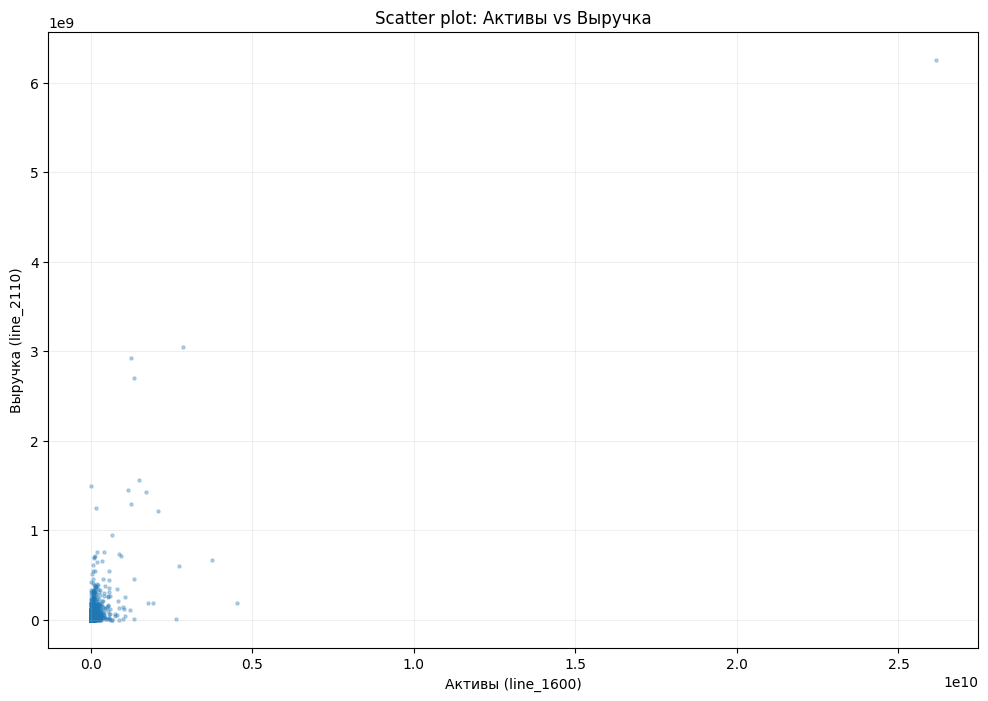

In [5]:
df = df_with_ratios  # чтобы короче

plt.figure(figsize=(12, 8))

plt.scatter(
    df["line_1600"],   # Активы всего
    df["line_2110"],   # Выручка
    alpha=0.3,
    s=5
)

plt.xlabel("Активы (line_1600)")
plt.ylabel("Выручка (line_2110)")
plt.title("Scatter plot: Активы vs Выручка")

plt.grid(True, alpha=0.2)
plt.show()

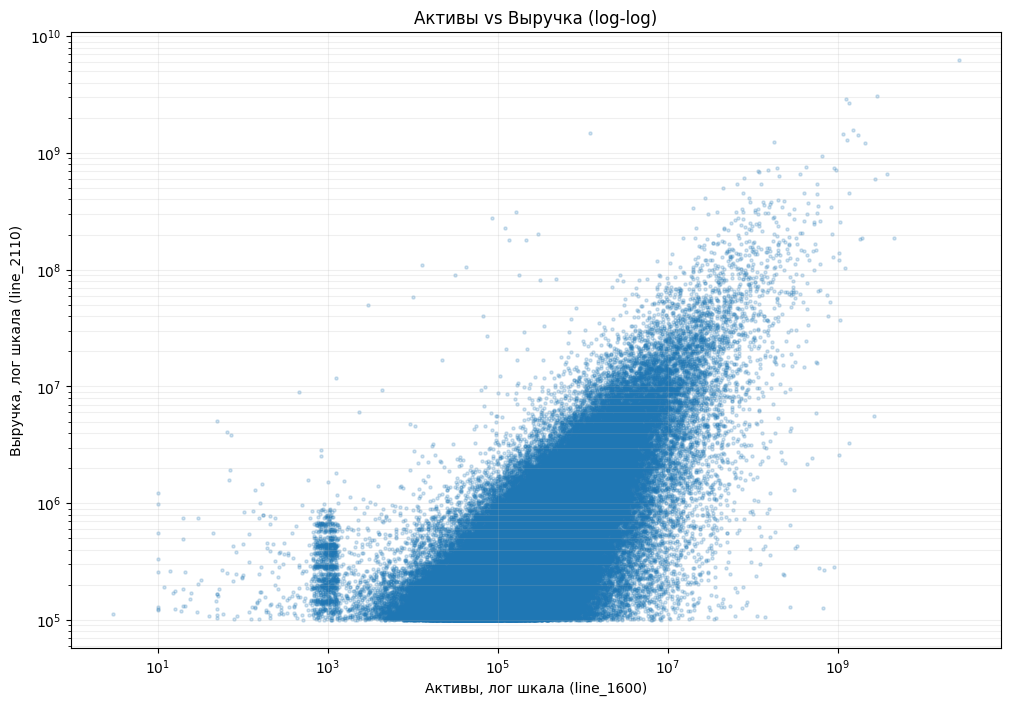

In [6]:
df = df_with_ratios.filter(
    (pl.col("line_1600") > 0) &
    (pl.col("line_2110") > 0)
).to_pandas()

plt.figure(figsize=(12, 8))
plt.scatter(
    df["line_1600"],
    df["line_2110"],
    s=5,
    alpha=0.2
)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Активы, лог шкала (line_1600)")
plt.ylabel("Выручка, лог шкала (line_2110)")
plt.title("Активы vs Выручка (log-log)")
plt.grid(True, which="both", alpha=0.2)
plt.show()

## Гистограмма

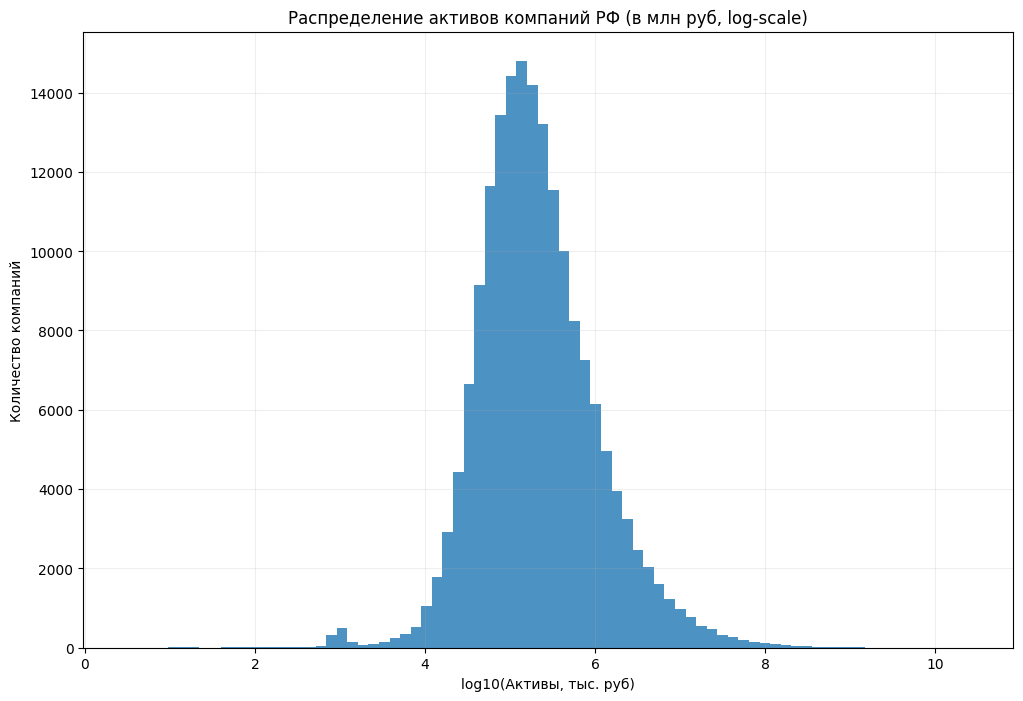

In [8]:
import numpy as np

df_assets_mln = df_with_ratios.filter(
    pl.col("line_1600") > 0
)["line_1600"].to_numpy() 

plt.figure(figsize=(12, 8))
plt.hist(
    np.log10(df_assets_mln),
    bins=80,
    alpha=0.8
)

plt.grid(True, which="both", alpha=0.2)
plt.xlabel("log10(Активы, тыс. руб)")
plt.ylabel("Количество компаний")
plt.title("Распределение активов компаний РФ (в млн руб, log-scale)")
plt.show()

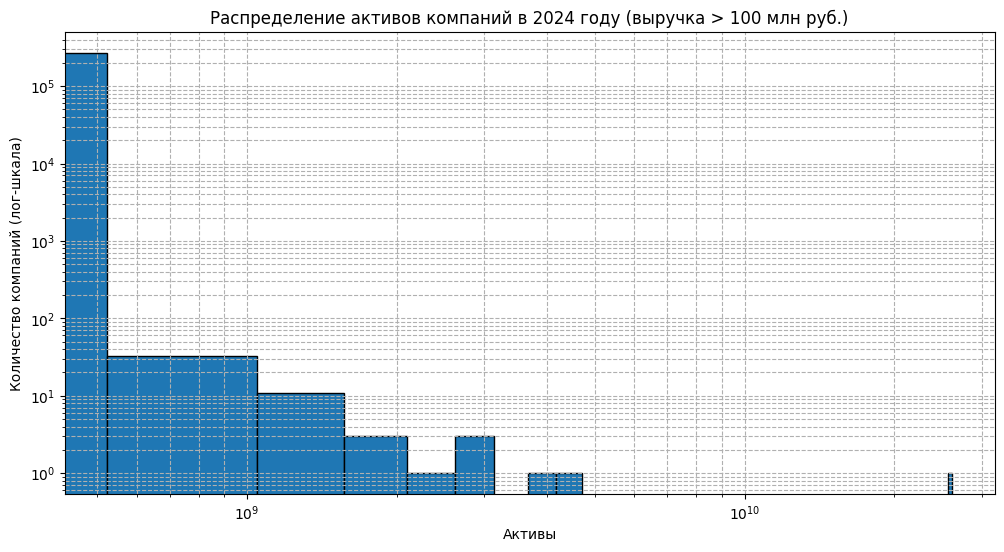

In [ ]:
# Визуализация данных
# Для визуализации можно конвертировать небольшие подвыборки в pandas
import matplotlib.pyplot as plt

# Пример: гистограмма распределения выручки
plt.figure(figsize=(12, 6))
# Конвертируем в pandas для визуализации (только для небольших подвыборок!)
df_pd = df_2024_sample.select(['line_1600']).to_pandas()
df_pd['line_1600'].hist(bins=50, edgecolor='black')
plt.xlabel('Активы')
plt.ylabel('Количество компаний (лог-шкала)')
plt.title('Распределение активов компаний в 2024 году ')
plt.yscale('log')
plt.xscale('log') # Логарифмическая шкала и для оси X для лучшей читаемости
plt.grid(True, which="both", ls="--")

plt.show()



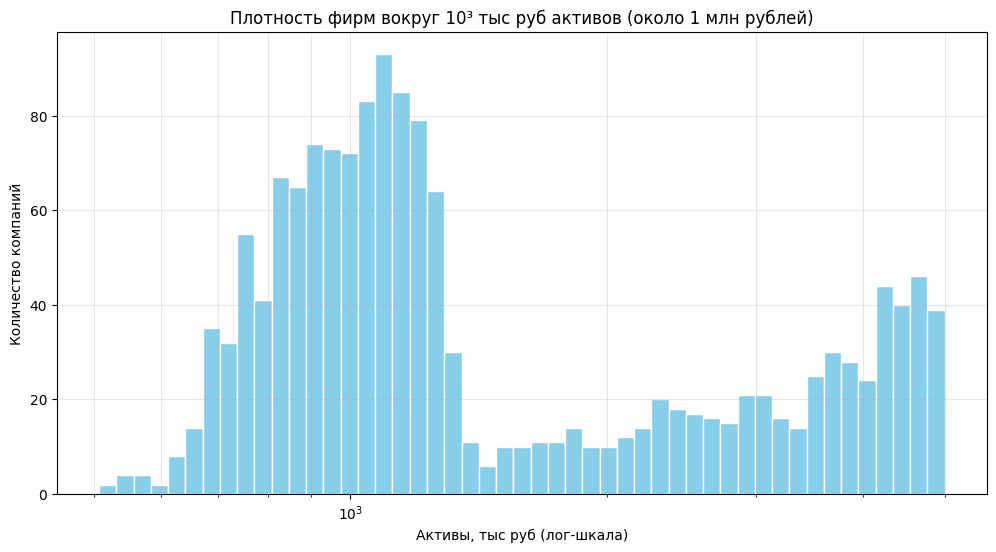

In [10]:
df_assets = df_with_ratios["line_1600"].to_numpy()

mask = (df_assets > 500) & (df_assets < 5000)   # диапазон вокруг 1000–4000 тыс руб
subset = df_assets[mask] # фильтруем 

bins = np.logspace(
    np.log10(subset.min()),
    np.log10(subset.max()),
    50
)

plt.figure(figsize=(12, 6))
plt.hist(subset, bins=bins, color="skyblue", edgecolor="white")
plt.xscale("log")
plt.xlabel("Активы, тыс руб (лог-шкала)")
plt.ylabel("Количество компаний")
plt.title("Плотность фирм вокруг 10³ тыс руб активов (около 1 млн рублей)")
plt.grid(True, which="both", alpha=0.3)
plt.show()


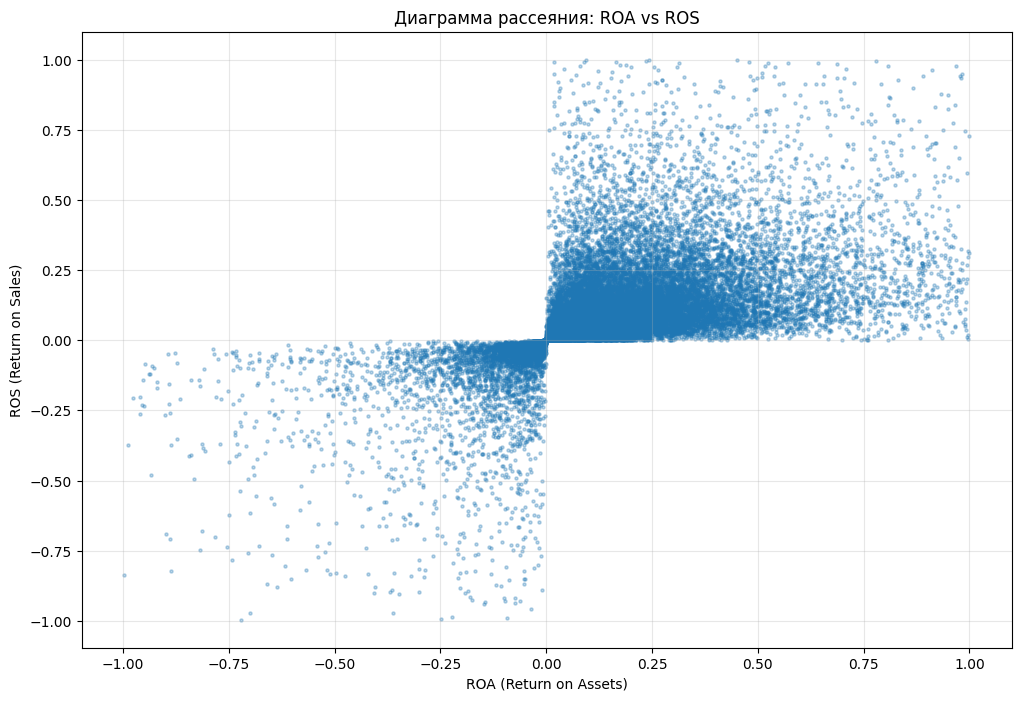

In [11]:
df = (
    df_with_ratios
    .filter(
        (pl.col("roa").is_finite()) &
        (pl.col("ros").is_finite()) &
        (pl.col("roa") > -1) & (pl.col("roa") < 1) &
        (pl.col("ros") > -1) & (pl.col("ros") < 1)
    )
    .sample(50_000, seed = 123)
    .to_pandas()
)

plt.figure(figsize=(12, 8))

plt.scatter(
    df["roa"],
    df["ros"],
    s=5,
    alpha=0.3
)

plt.xlabel("ROA (Return on Assets)")
plt.ylabel("ROS (Return on Sales)")
plt.title("Диаграмма рассеяния: ROA vs ROS")
plt.grid(True, alpha=0.3)

plt.show()


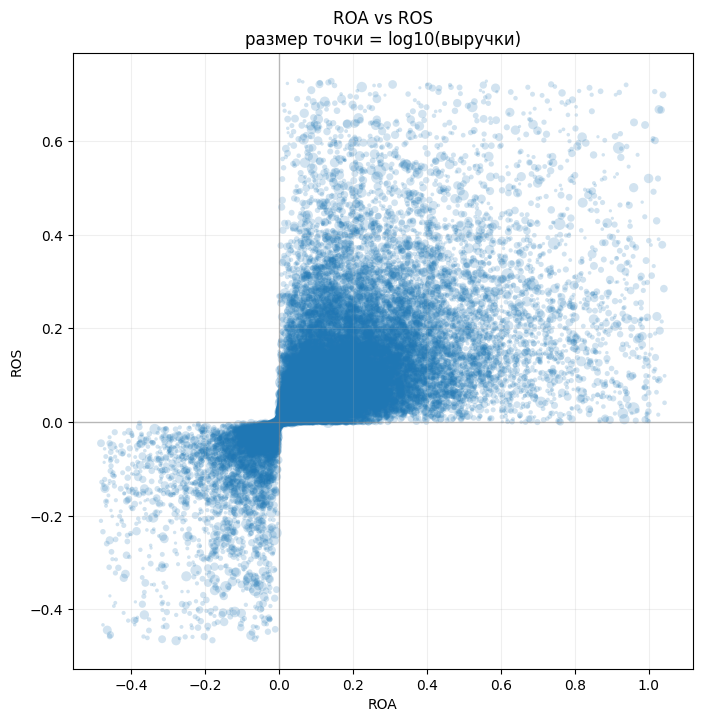

In [12]:
# Фильтруем данные
df = (
    df_with_ratios
    .filter(
        (pl.col("roa").is_finite()) &
        (pl.col("ros").is_finite()) &
        (pl.col("line_2110") > 0)
    )
    .to_pandas()
)

# Убираем  выбросы по квантилям
q_low  = df[["roa", "ros"]].quantile(0.01)
q_high = df[["roa", "ros"]].quantile(0.99)

df = df[
    df["roa"].between(q_low["roa"], q_high["roa"]) &
    df["ros"].between(q_low["ros"], q_high["ros"])
]

# Сэмпл для читаемости (можно увеличить)
df = df.sample(50_000, random_state=42)

# Лог-выручка и размер точки
df["log_rev"] = np.log10(df["line_2110"])
sizes = 5 + (df["log_rev"] - df["log_rev"].min()) * 25   # масштабируем

# Построение scatter
plt.figure(figsize=(8, 8))

plt.scatter(
    df["roa"],
    df["ros"],
    s=sizes,
    alpha=0.2,
    color="tab:blue",
    edgecolors="none"
)

# оси и оформление
plt.axvline(0, color="grey", linewidth=1, alpha=0.5)
plt.axhline(0, color="grey", linewidth=1, alpha=0.5)

plt.xlabel("ROA")
plt.ylabel("ROS")
plt.title("ROA vs ROS\nразмер точки = log10(выручки)")
plt.grid(True, alpha=0.2)

plt.show()

---

##  Практическое задание 1: Визуализация данных

**Время: 15-20 минут**

**Задание:**
Используя данные с рассчитанными финансовыми показателями:

1. Постройте гистограмму распределения выручки. Используйте логарифмическую шкалу по оси Y.

2. Постройте scatter plot зависимости процентов уплаченных и процентов полученных. Какие выводы можно сделать

3. Постройте столбчатую диаграмму средних значений ROS по отраслям (секциям ОКВЭД).

**Подсказка:** 
- Конвертируйте данные в pandas для визуализации: `.to_pandas()`
- Используйте `plt.hist()`, `plt.scatter()`, `plt.bar()` из matplotlib
- Не забудьте добавить подписи осей и заголовки


In [14]:
df = (
    df_with_ratios
    .filter(
        
        (pl.col('ros').is_between(-0.5, 0.5)) &      # ROS от -50% до +50%
        (pl.col('leverage').is_between(0, 2)) &      # Леверидж от 0 до 2
        (pl.col('roa').is_between(-0.5, 0.5))        # ROA от -50% до +50%
    )
    .to_pandas()
)

In [15]:
# Выбираем Топ-5 отраслей по количеству компаний для чистоты графика
top_5_sections = df['okved_section'].value_counts().head(5).index
df_risk_return = df[df['okved_section'].isin(top_5_sections)]
top_5_sections

Index(['G', 'C', 'F', 'H', 'M'], dtype='object', name='okved_section')

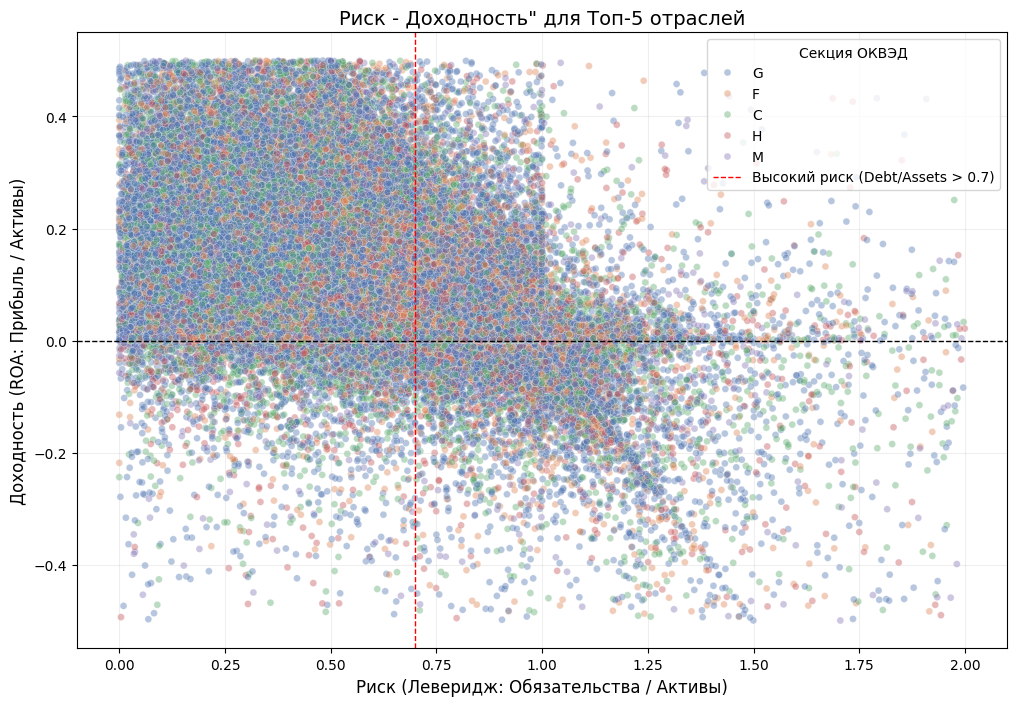

In [17]:
plt.figure(figsize=(12, 8))

# Scatterplot из пакета seaborne
sns.scatterplot(
    data=df_risk_return, 
    x='leverage', 
    y='roa', 
    hue='okved_section', # цвет 
    alpha=0.4, 
    s=25,
    palette='deep'
)

# Добавляем линии квадрантов
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Граница убыточности
plt.axvline(0.7, color='red', linestyle='--', linewidth=1, label='Высокий риск (Debt/Assets > 0.7)')

plt.title('Риск - Доходность" для Топ-5 отраслей', fontsize=14)
plt.xlabel('Риск (Леверидж: Обязательства / Активы)', fontsize=12)
plt.ylabel('Доходность (ROA: Прибыль / Активы)', fontsize=12)
plt.legend(title='Секция ОКВЭД', loc='upper right')
plt.grid(True, alpha=0.2)

plt.show()

## Линия регрессии на графике

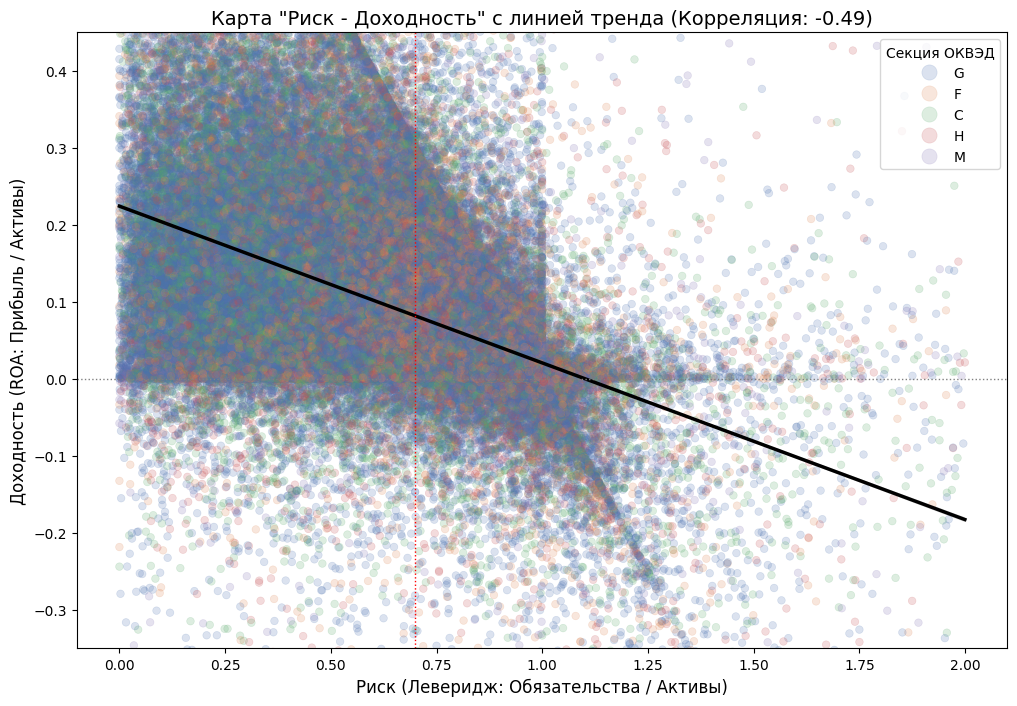

In [ ]:
from scipy import stats

plt.figure(figsize=(12, 8))

# 1. Рисуем точки (Scatter)
# alpha=0.2 делает точки более прозрачными (20% непрозрачности)
sns.scatterplot(
    data=df_risk_return, 
    x='leverage', 
    y='roa', 
    hue='okved_section', 
    alpha=0.2,           # прозрчность 
    s=30,
    palette='deep',
    edgecolor=None       # Убираем контуры точек для чистоты
)

# 2. Рисуем общую линию регрессии (Trend line)
# scatter=False — не рисовать точки заново, только линию
sns.regplot(
    data=df_risk_return, 
    x='leverage', 
    y='roa', 
    scatter=False, 
    color='black', 
    line_kws={"linewidth": 2.5, "linestyle": "-"}
)

# Добавляем линии квадрантов
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.axvline(0.7, color='red', linestyle=':', linewidth=1)

# Считаем корреляцию для заголовка
corr = df_risk_return[['leverage', 'roa']].corr().iloc[0, 1]

plt.title(f'Риск - Доходность" с линией тренда (корреляция: {corr:.2f})', fontsize=14)
plt.xlabel('Риск (Леверидж: Обязательства / Активы)', fontsize=12)
plt.ylabel('Доходность (ROA: Прибыль / Активы)', fontsize=12)
plt.legend(title='Секция ОКВЭД', loc='upper right', markerscale=2) # Увеличиваем точки в легенде
plt.ylim(-0.35, 0.45) # Немного подрежем границы для фокуса на центре

plt.show()

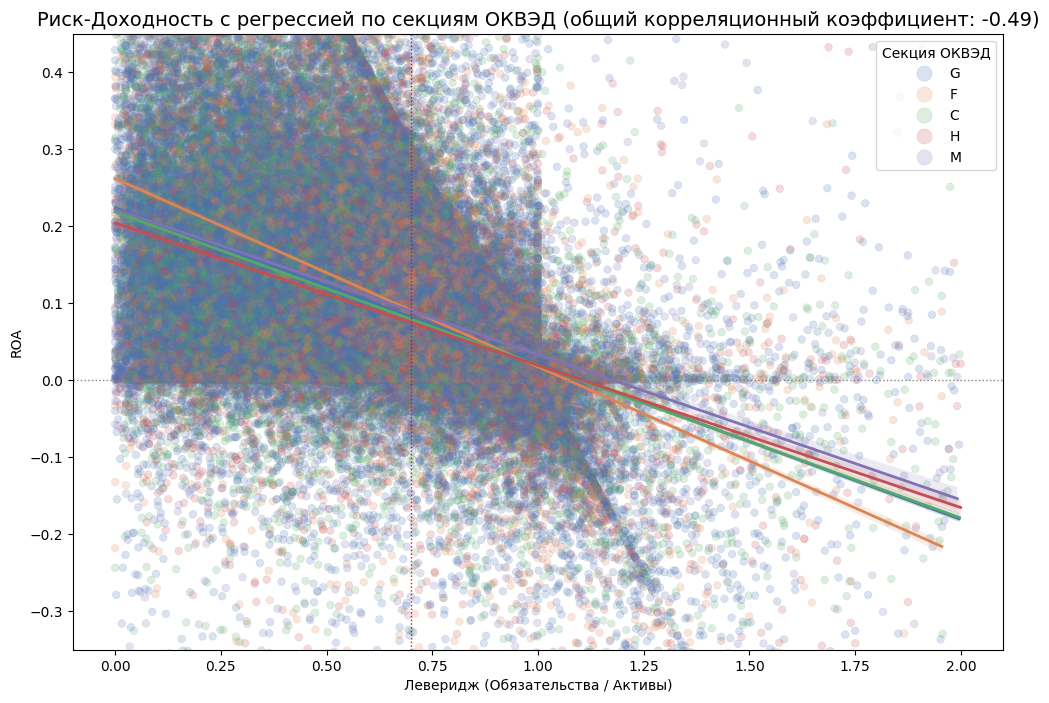

In [ ]:
plt.figure(figsize=(12, 8))

# 1. Scatterplot с цветовыми секциями
sns.scatterplot(
    data=df_risk_return,
    x='leverage', 
    y='roa',
    hue='okved_section',
    alpha=0.2,
    s=30,
    palette='deep',
    edgecolor=None
)

# 2. Линии регрессии по каждой секции ОКВЭД
sections = df_risk_return['okved_section'].unique()
palette = sns.color_palette('deep', n_colors=len(sections))

for section, color in zip(sections, palette):
    df_sub = df_risk_return[df_risk_return['okved_section'] == section]
    
    sns.regplot(
        data=df_sub, 
        x='leverage', 
        y='roa',
        scatter=False,
        color=color,
        line_kws={"linewidth": 2}
    )

# Квадранты
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.axvline(0.7, color='red', linestyle=':', linewidth=1)

# Заголовок
corr = df_risk_return[['leverage', 'roa']].corr().iloc[0, 1]
plt.title(f'Риск-Доходность с регрессией по секциям ОКВЭД (общий корреляционный коэффициент: {corr:.2f})', fontsize=14)
plt.xlabel('Леверидж (Обязательства / Активы)')
plt.ylabel('ROA')

plt.legend(title='Секция ОКВЭД', loc='upper right', markerscale=2)
plt.ylim(-0.35, 0.45)

plt.show()


В теории корпоративных финансов долг (леверидж) используется для ускорения роста **(финансовый рычаг)**.

**На графике**. Черная линия тренда идет круто вниз. Каждое увеличение доли заемных средств в структуре капитала снижает рентабельность активов (ROA).

**Вывод**. Успешные компании стараются развиваться на свои. Высокий долг здесь — это чаще всего признак беды (кассовые разрывы, покрытие убытков), а не стратегия агрессивной экспансии.

## Hexbin - диаграмма

Hexbin-диаграмма — это способ визуализации больших массивов точек, когда обычный scatterplot превращается в плотную «тучу» и перестает быть информативным. 

Вместо отдельных точек график разбивает пространство на шестиугольные ячейки и показывает, сколько компаний попадает в каждую область. 

Для данных RFSD это позволяет увидеть структуру распределения компаний по двум финансовым показателям одновременно, например ROA и ROS. Hexbin помогает быстро выявлять плотные кластеры, зоны аномалий и общие закономерности, которые не заметны при стандартном scatterplot даже на выборке в десятки тысяч фирм.

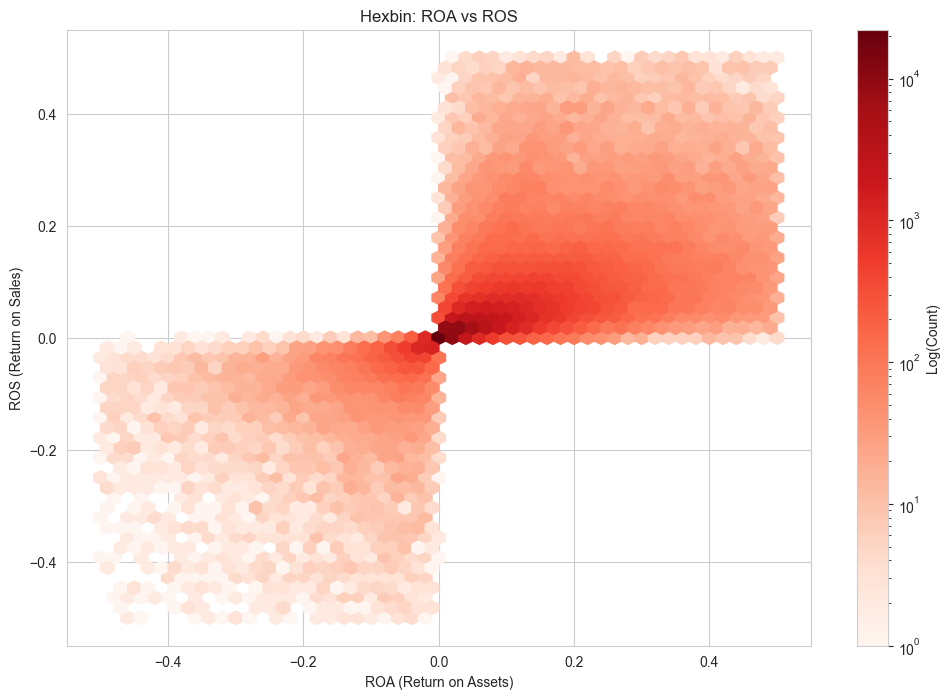

In [ ]:
sns.set_style("whitegrid")

hb = plt.hexbin(
    df["roa"],
    df["ros"],
    gridsize=50,
    cmap="Reds",
    mincnt=1,   # минимальное количество точек, чтобы шестиуголник был закрашен
    bins="log"
)

plt.colorbar(hb, label="Log(Count)")
plt.xlabel("ROA (Return on Assets)")
plt.ylabel("ROS (Return on Sales)")
plt.title("Hexbin: ROA vs ROS")
plt.show()


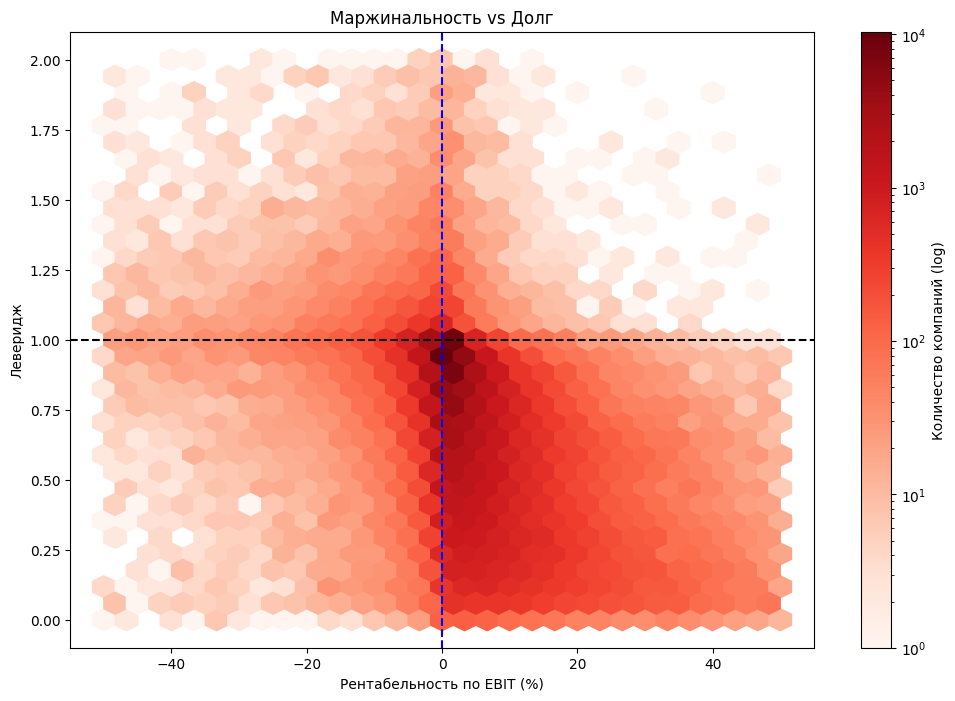

In [22]:
# 
# EBIT Margin vs Leverage
df_alt = df[

    (df['ebitda_margin'].between(-0.5, 0.5)) & 
    (df['leverage'].between(0, 2))
]

hb = plt.hexbin(
    df_alt['ebitda_margin'] * 100, # В процентах
    df_alt['leverage'], 
    gridsize=30, 
    cmap='Reds', 
    mincnt=1,
    bins='log',
    extent=(-50, 50, 0, 2)
)
plt.colorbar(hb, label='Количество компаний (log)')

plt.axvline(0, color='blue', linestyle='--')
plt.axhline(1.0, color='black', linestyle='--')

plt.title('Маржинальность vs Долг')
plt.xlabel('Рентабельность по EBIT (%)')
plt.ylabel('Леверидж')
plt.show()

# Анализ Дюпона: как разложить прибыльность компании на факторы

**Анализ Дюпона** — это метод, который позволяет понять, *за счет чего именно* компания формирует свою рентабельность собственного капитала (ROE). Вместо одного общего показателя мы раскладываем ROE на несколько понятных компонентов и видим источники эффективности или проблемы бизнеса.

- Модель "Пятерочки" (Ритейл): Низкая маржа, но очень высокая скорость оборота.
- Модель "Газпрома" (Капитал): Низкая скорость (огромные заводы), но высокая маржа с каждой продажи.


## 1. Классическая формула Дюпона (трехфакторная)

ROE раскладывается на три части:

$$
\text{ROE} = \text{Net Profit Margin} \times \text{Asset Turnover} \times \text{Equity Multiplier}
$$

Где:

* **Net Profit Margin (чистая маржа)**
  Показывает, сколько прибыли остается с каждого рубля выручки. Это характеристика операционной эффективности и контроля затрат.

* **Asset Turnover (оборачиваемость активов)**
  Насколько эффективно компания использует свои активы для генерации выручки. Высокая оборачиваемость говорит о хорошей деловой активности.

* **Equity Multiplier (финансовый рычаг, Leverage)**
  Соотношение активов и собственного капитала:
  $$
  EM = \frac{\text{Assets}}{\text{Equity}}
  $$
  Показывает степень использования заемных средств.


## 2. Экономический смысл разложения

Анализ Дюпона отвечает на ключевые вопросы:

* **Компания зарабатывает за счет высоких маржей или из-за высокой оборачиваемости?**
* **Прибыльность достигается экономически или искусственно — через рост долга?**
* **Где узкие места: в продажах, в себестоимости, в капиталоемкости или в структуре финансирования?**

Два бизнеса могут иметь одинаковый ROE, но один зарабатывает благодаря сильной операционной модели, а другой — только из-за агрессивного долга.


## 3. Пример  с данными RFSD

В данных RFSD у нас есть ключевые показатели:

* прибыль
* выручка
* активы
* собственный капитал
* обязательства

Поэтому мы можем:

1. **рассчитать ROE по компаниям**,
2. **разложить его на три компонента**,
3. **построить дистрибутивы и сравнить отрасли**,
4. **найти компании, где ROE высокое только из-за Leverage**, что повышает финансовые риски.

Это дает структурную картину эффективности в разрезе экономики.


* ROE сам по себе мало что говорит.
* Через Дюпон-анализ становится понятно *почему* ROE именно такой.
* Это инструмент диагностики: можно точно определить, что улучшать
  — маржу, оборачиваемость или структуру капитала.
* В прикладных задачах (например, корпоративное кредитование или оценка стоимости) это помогает отделить здоровый рост от рискованного.



**Ось X**: Оборачиваемость активов (Выручка / Активы) — "Скорость бизнеса".

**Ось Y**: Рентабельность продаж (ROS) — "Наценка".

**Кривые линии**: Это линии равного ROA (изокванты).

In [28]:
# 1. Подготовка данных
# Нам нужны только прибыльные компании для этого анализа (чтобы видеть модель заработка)
df_dupont = (
    df_with_ratios
    .filter(
        pl.col("ros").is_between(0, 0.5) &
        (pl.col("line_2110") > 0) &
        (pl.col("line_1600") > 0)
    )
    .to_pandas()
)

# Считаем оборачиваемость (Asset Turnover)
df_dupont['asset_turnover'] = df_dupont['line_2110'] / df_dupont['line_1600']

# Фильтруем экстремальную оборачиваемость (обычно она от 0 до 5 оборотов в год)
df_dupont = df_dupont[df_dupont['asset_turnover'].between(0, 6)]

# Оставляем Топ-5 отраслей для сравнения
top_sections = df_dupont['okved_section'].value_counts().head(5).index
df_dupont = df_dupont[df_dupont['okved_section'].isin(top_sections)]

<positron-console-cell-35>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


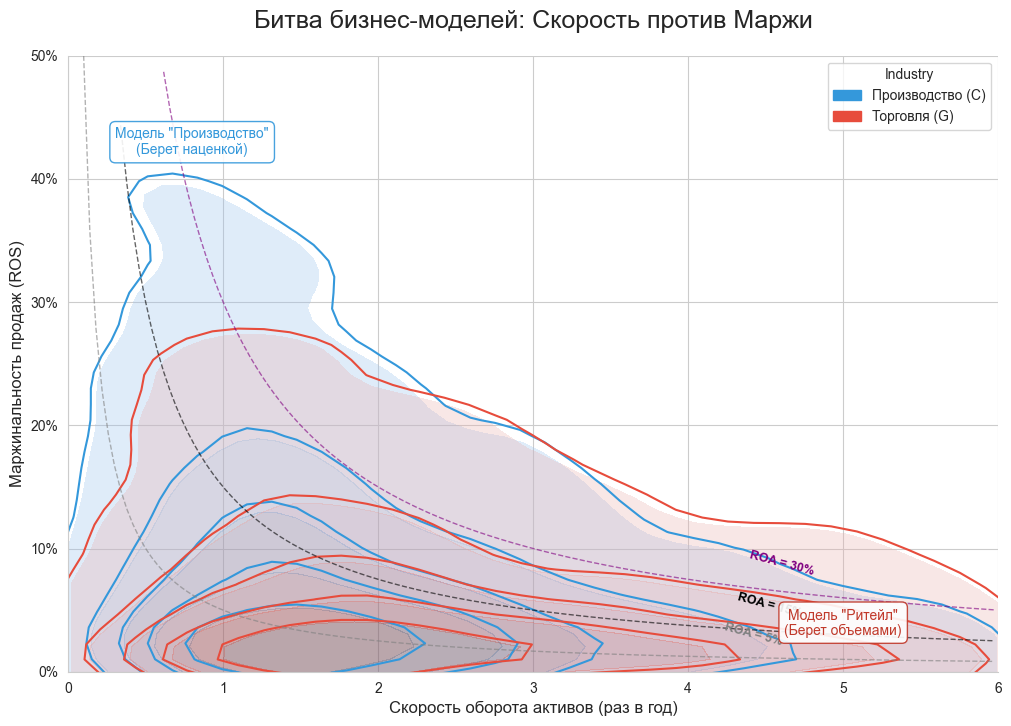

In [35]:
import matplotlib.ticker as ticker

# 1. Выбор и ОПТИМИЗАЦИЯ данных (Downsampling)
target_sections = ['G', 'C', 'A']

# Берем случайные 3000-5000 точек для каждой отрасли. 
# Этого более чем достаточно для построения гладких контуров.
df_sampled = (
    df_dupont
    .groupby('okved_section', group_keys=False) # group_keys=False чтобы не ломать индекс
    .apply(lambda x: x.sample(n=min(len(x), 3000), random_state=42)) # 3000 точек на отрасль
)

section_names = {
    'G': 'Торговля (G)',
    'C': 'Производство (C)', 
    'A': 'Сельское хоз-во (A)'
}
df_sampled['Industry'] = df_sampled['okved_section'].map(section_names)

palette = {
    'Торговля (G)': '#e74c3c', # красный
    'Производство (C)': '#3498db', # синий
     'Сельское хоз-во (A)': '#f1c40f' # желтый
}

# 2. Быстрый KDE (с меньшим gridsize)
# заливки плотности (fill=True).
# gridsize=50 (по умолчанию 100 или 200). Уменьшение ускоряет расчет
sns.kdeplot(
    data=df_sampled,
    x='asset_turnover',
    y='ros',
    hue='Industry',
    palette=palette,
    fill=True,
    alpha=0.3,
    thresh=0.05,
    levels=6,      # Меньше уровней - быстрее
    cut=0,
    gridsize=50    # Ключевой параметр для скорости
)

# рисует контурные линии (fill=False), без отдельной легенды
sns.kdeplot(
    data=df_sampled,
    x='asset_turnover',
    y='ros',
    hue='Industry',
    palette=palette,
    fill=False,
    linewidths=1.5,
    thresh=0.05,
    levels=6,
    gridsize=50,    # ключевой параметр для скорости
    legend=False
)

# 3. Изо-кривые и оформление (это быстро!)

# x_range задает ось X для расчета кривой.
# Для каждого значения ROA строится кривая ROS = ROA / AssetTurnover.
# mask обрезает кривую только в разумном диапазоне (ROS до 0.5 и X до 6).
# plt.plot(...) рисует пунктирные линии ROA.
# plt.text(...) подписывает линии примерно в 70 процентах от их длины.

x_range = np.linspace(0.1, 8, 200)
for roa, color in zip([0.05, 0.15, 0.30], ['gray', 'black', 'purple']):
    y_curve = roa / x_range
    mask = (y_curve <= 0.5) & (x_range <= 6)
    plt.plot(x_range[mask], y_curve[mask], '--', color=color, linewidth=1, alpha=0.6)
    
    if len(x_range[mask]) > 0:
        idx = int(len(x_range[mask]) * 0.7)
        plt.text(x_range[mask][idx], y_curve[mask][idx] + 0.01, f'ROA = {roa*100:.0f}%', 
                 color=color, fontsize=9, fontweight='bold', rotation=-15)

plt.title('Битва бизнес-моделей: Скорость против Маржи', fontsize=18, pad=20)
plt.xlabel('Скорость оборота активов (раз в год)', fontsize=12)
plt.ylabel('Маржинальность продаж (ROS)', fontsize=12)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0))
plt.xlim(0, 6)
plt.ylim(0, 0.5)

plt.text(5.0, 0.03, 'Модель "Ритейл"\n(Берет объемами)', 
         ha='center', fontsize=10, color='#c0392b',
         bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#c0392b", alpha=0.9))

plt.text(0.8, 0.42, 'Модель "Производство"\n(Берет наценкой)', 
         ha='center', fontsize=10, color='#3498db',
         bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="#3498db", alpha=0.9))

sns.despine() # облегчение графика 
plt.show()

График "Битва бизнес-моделей" (Скорость vs Маржа) показывает фундаментальные различия в том, как отрасли зарабатывают деньги. 


Главные выводы из распределения плотности:

### 1. Торговля (G, Красные контуры) — "Короли скорости"
*   **Форма:** "Пятно" сильно вытянуто вправо вдоль оси X (высокая скорость).
*   **Позиция:** Основная масса торговых компаний имеет низкую маржу (1-5%), но высокую оборачиваемость (3-6 раз в год и выше).
*   **Суть модели:** Зарабатывают на объеме. Они не могут позволить себе наценку в 30%, иначе уйдут покупатели. Чтобы получить приемлемый ROA (например, 15%), им нужно обернуть капитал 5-6 раз за год.
*   **Риск:** Любое замедление продаж (затоваривание складов) убивает их эффективность мгновенно, так как маржа слишком тонка, чтобы простить ошибки.

### 2. Производство (C, Синие контуры) 
*   **Форма:** Занимает промежуточное положение.
*   **Позиция:** Оборачиваемость 1-2 раза в год, маржинальность 5-15%.
*   **Суть модели:** Баланс. Производственный цикл короче, чем в с/х, но длиннее, чем в торговле.

### "Стена эффективности" (Гипербола ROA)
Обратите внимание, как верхняя граница всех областей (и красной, и желтой, и синей) словно упирается в невидимую дугу.
*   Это и есть **ограничение конкуренции**. Невозможно иметь маржу 40% (как в с/х) и скорость 6 оборотов (как в ритейле) одновременно. Такая компания имела бы ROA 240% и мгновенно захватила бы рынок (или привлекла бы тысячи конкурентов, которые сбили бы маржу).
*   Бизнес вынужден выбирать: либо ты быстрый и дешевый (Ритейл), либо медленный и дорогой (Агро/Пром).

**Итог:** График наглядно доказывает, что сравнивать маржинальность "Пятерочки" и "Русагро" напрямую — бессмысленно. У них разная модель бизнеса. Сравнивать нужно их ROA (насколько далеко они от начала координат).

In [31]:
df_dupont.columns

Index(['inn', 'ogrn', 'region', 'okved', 'okved_section', 'line_2110',
       'line_2300', 'line_2320', 'line_2330', 'line_2400', 'line_1100',
       'line_1200', 'line_1250', 'line_1600', 'line_1300', 'line_1400',
       'line_1500', 'line_1700', 'line_4221', 'filed', 'eligible', 'ros',
       'roa', 'leverage', 'debt_to_equity', 'ebit', 'ebitda', 'ebitda_margin',
       'interest_to_revenue', 'interest_to_assets', 'interest_coverage',
       'interest_to_net_profit', 'current_ratio', 'asset_turnover'],
      dtype='object')

График показывает две фундаментальные стратегии зарабатывания денег:

**Производство**: продавать дорогой продукт с высокой маржой, но медленно

**Ритейл**: продавать дешево, но очень быстро и большими объемами

Линии ROA показывают, что обе стратегии могут давать одинаковую эффективность активов — просто разными способами.

## Кривая Лоренца


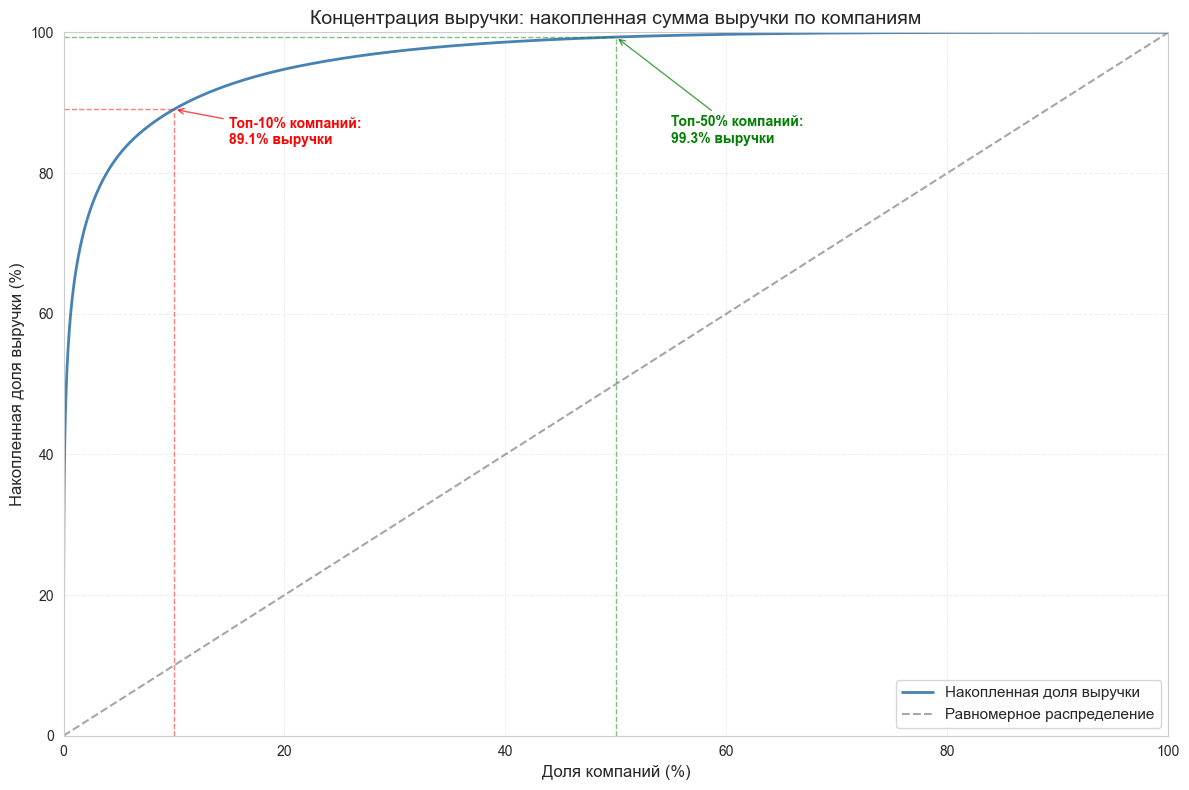


Статистика концентрации выручки:
Всего компаний: 1,666,281
Общая выручка: 335.97 трлн руб.
Топ-10% компаний генерируют: 89.1% выручки
Топ-50% компаний генерируют: 99.3% выручки


In [40]:
# График накопленной суммы выручки (кривая Лоренца)
# Показывает концентрацию выручки: какая доля компаний генерирует какую долю общей выручки

import numpy as np

df_2024_full = lf_2024.collect() # давайте возьмем все данные за 2024 год

# Сортируем компании по выручке по убыванию
df_sorted = (
    df_2024_full
    .filter(pl.col("line_2110").is_finite())    # оставить только конечные значения по выручке 
    .select("line_2110")                        # выбрать нужный столбец
    .sort("line_2110", descending=True)         # сортировка
    .to_pandas()
)


# Рассчитываем накопленную сумму выручки
df_sorted['cumulative_revenue'] = df_sorted['line_2110'].cumsum()
total_revenue = df_sorted['line_2110'].sum()

# Рассчитываем проценты
df_sorted['cumulative_pct_revenue'] = (df_sorted['cumulative_revenue'] / total_revenue) * 100
df_sorted['pct_companies'] = (np.arange(1, len(df_sorted) + 1) / len(df_sorted)) * 100

# Строим график
plt.figure(figsize=(12, 8))

# График накопленной доли выручки
plt.plot(df_sorted['pct_companies'], df_sorted['cumulative_pct_revenue'], 
         linewidth=2, label='Накопленная доля выручки', color='steelblue')

# Линия равенства (если бы выручка распределялась равномерно)
plt.plot([0, 100], [0, 100], '--', linewidth=1.5, color='gray', 
         label='Равномерное распределение', alpha=0.7)

plt.xlabel('Доля компаний (%)', fontsize=12)
plt.ylabel('Накопленная доля выручки (%)', fontsize=12)
plt.title('Концентрация выручки: накопленная сумма выручки по компаниям', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 100)
plt.ylim(0, 100)

# Добавляем аннотации для ключевых точек
# Топ-10% компаний
top_10_pct_idx = int(len(df_sorted) * 0.1)
if top_10_pct_idx > 0:
    top_10_revenue_pct = df_sorted.iloc[top_10_pct_idx - 1]['cumulative_pct_revenue']
    plt.plot([10, 10], [0, top_10_revenue_pct], 'r--', alpha=0.5, linewidth=1)
    plt.plot([0, 10], [top_10_revenue_pct, top_10_revenue_pct], 'r--', alpha=0.5, linewidth=1)
    plt.annotate(f'Топ-10% компаний:\n{top_10_revenue_pct:.1f}% выручки', 
                xy=(10, top_10_revenue_pct), xytext=(15, top_10_revenue_pct - 5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=10, color='red', fontweight='bold')

# Топ-50% компаний
top_50_pct_idx = int(len(df_sorted) * 0.5)
if top_50_pct_idx > 0:
    top_50_revenue_pct = df_sorted.iloc[top_50_pct_idx - 1]['cumulative_pct_revenue']
    plt.plot([50, 50], [0, top_50_revenue_pct], 'g--', alpha=0.5, linewidth=1)
    plt.plot([0, 50], [top_50_revenue_pct, top_50_revenue_pct], 'g--', alpha=0.5, linewidth=1)
    plt.annotate(f'Топ-50% компаний:\n{top_50_revenue_pct:.1f}% выручки', 
                xy=(50, top_50_revenue_pct), xytext=(55, top_50_revenue_pct - 15),
                arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
                fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# Выводим статистику концентрации
print(f"\nСтатистика концентрации выручки:")
print(f"Всего компаний: {len(df_sorted):,}")
print(f"Общая выручка: {total_revenue / 1_000_000_000:.2f} трлн руб.")
if top_10_pct_idx > 0:
    print(f"Топ-10% компаний генерируют: {top_10_revenue_pct:.1f}% выручки")
if top_50_pct_idx > 0:
    print(f"Топ-50% компаний генерируют: {top_50_revenue_pct:.1f}% выручки")



График показывает насколько неравномерно распределена выручка между компаниями.

Это классическая кривая Лоренца:

**ось X** — доля компаний

**ось Y** — доля накопленной выручки

Линия равномерности (45 градусов):
если бы каждая компания давала одинаковую выручку, то 10% компаний давали бы 10% выручки, 50% — 50%, 100% — 100%.

## Зависимость рентабельности от выручки

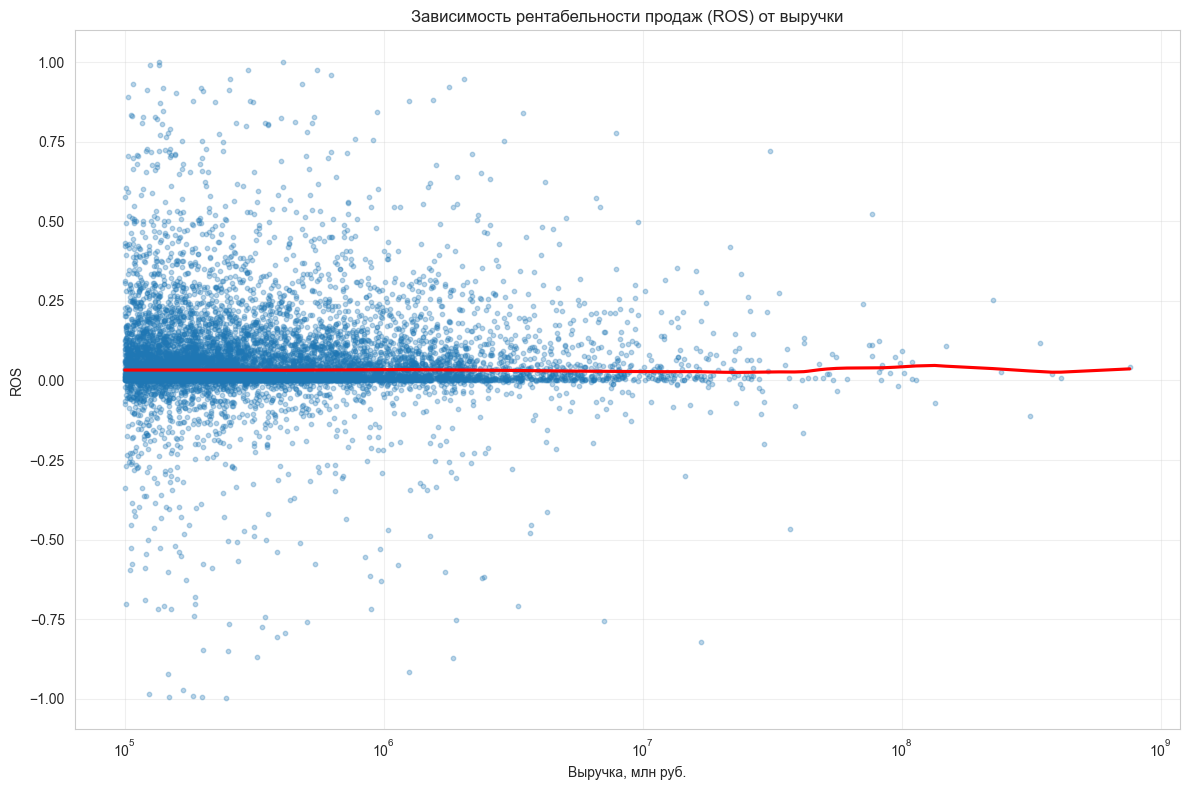

In [44]:
# 2. Scatter plot зависимости ROS от выручки
import seaborn as sns

df_ratios_pd = df_with_ratios.to_pandas()

# Отфильтруем выбросы для наглядности
# Выручка в тыс. руб., поэтому фильтруем разумные значения (от 1 млн до 100 млрд руб.)
df_ratios_pd_filtered = df_ratios_pd[
    (df_ratios_pd['ros'].between(-1, 1)) &  # ROS от -100% до +100%
    (df_ratios_pd['line_2110'] > 0) &  # Выручка положительная
    (df_ratios_pd['line_2110'] < 100_000_000_000)  # Выручка < 100 млрд руб.
]

# Семпл для ускорения визуализации
sample_size = 10_000
df_ratios_sampled = df_ratios_pd_filtered.sample(
    n=min(sample_size, len(df_ratios_pd_filtered)),
    random_state=42
)

sns.regplot(
    data=df_ratios_sampled,
    x='line_2110',
    y='ros',
    lowess=True,         # LOESS
    scatter_kws={'s': 10, 'alpha': 0.3},
    line_kws={'color': 'red'}
)

plt.xscale('log')
plt.title('Зависимость рентабельности продаж (ROS) от выручки')
plt.xlabel('Выручка, млн руб.')
plt.ylabel('ROS')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Если кривая сильно изогнута вниз — это говорит о высокой концентрации выручки в узкой группе крупных фирм.

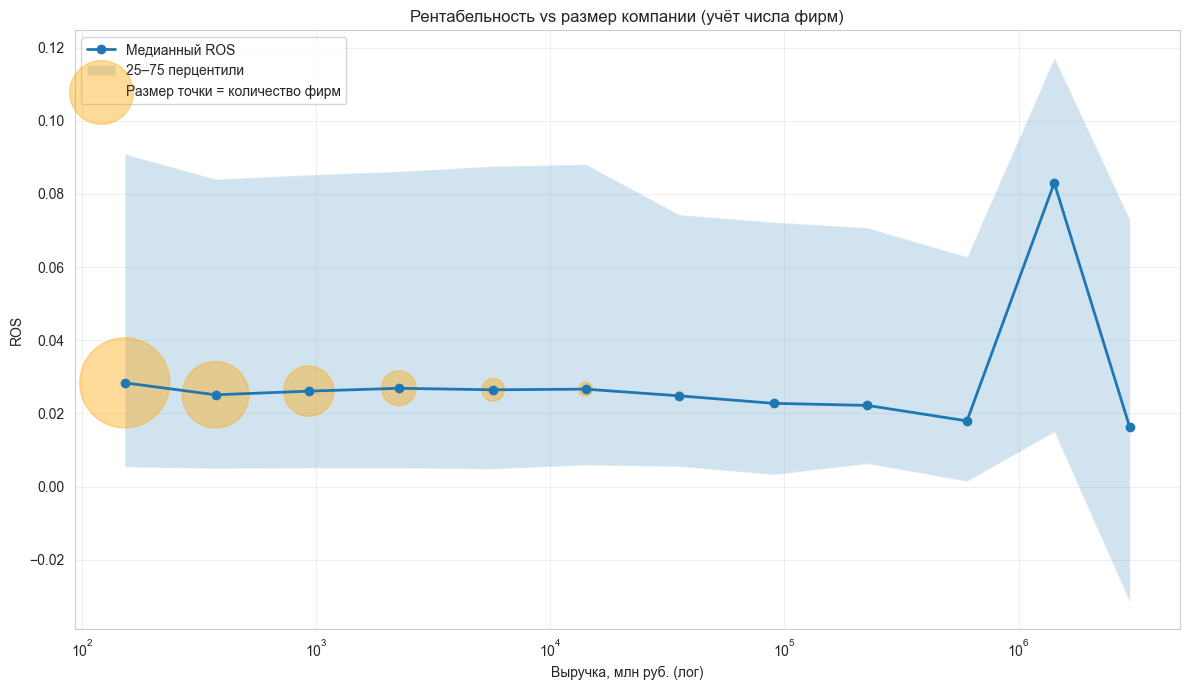

In [43]:
import pandas as pd 
# 1. Фильтрация (если нужна)
df = df_with_ratios.to_pandas()

# Выручка в млн руб.
df['rev_mln'] = df['line_2110'] / 1_000

# 2. Логарифмические бины по выручке
n_bins = 12  # можешь поменять
bins = np.logspace(
    np.log10(df['rev_mln'].min()),
    np.log10(df['rev_mln'].max()),
    n_bins + 1
)

# создаётся rev_bin
df['rev_bin'] = pd.cut(df['rev_mln'], bins=bins)

# 3. Группировка по rev_bin
grp = (
    df.groupby('rev_bin', observed=True)
      .agg(
          rev_mid=('rev_mln', 'median'),
          ros_med=('ros', 'median'),
          ros_q25=('ros', lambda x: x.quantile(0.25)),
          ros_q75=('ros', lambda x: x.quantile(0.75)),
          count=('ros', 'size')
      )
      .dropna()
)

# 4. График
plt.figure(figsize=(12, 7))

plt.plot(grp['rev_mid'], grp['ros_med'], marker='o', linewidth=2, label='Медианный ROS')

plt.fill_between(
    grp['rev_mid'],
    grp['ros_q25'],
    grp['ros_q75'],
    alpha=0.2,
    label='25–75 перцентили'
)

# пузырьки по числу фирм
plt.scatter(
    grp['rev_mid'],
    grp['ros_med'],
    s=grp['count'] * 0.05,  # масштаб можно подправить
    alpha=0.4,
    color='orange',
    label='Размер точки = количество фирм'
)

plt.xscale('log')
plt.xlabel('Выручка, млн руб. (лог)')
plt.ylabel('ROS')
plt.title('Рентабельность vs размер компании (учёт числа фирм)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


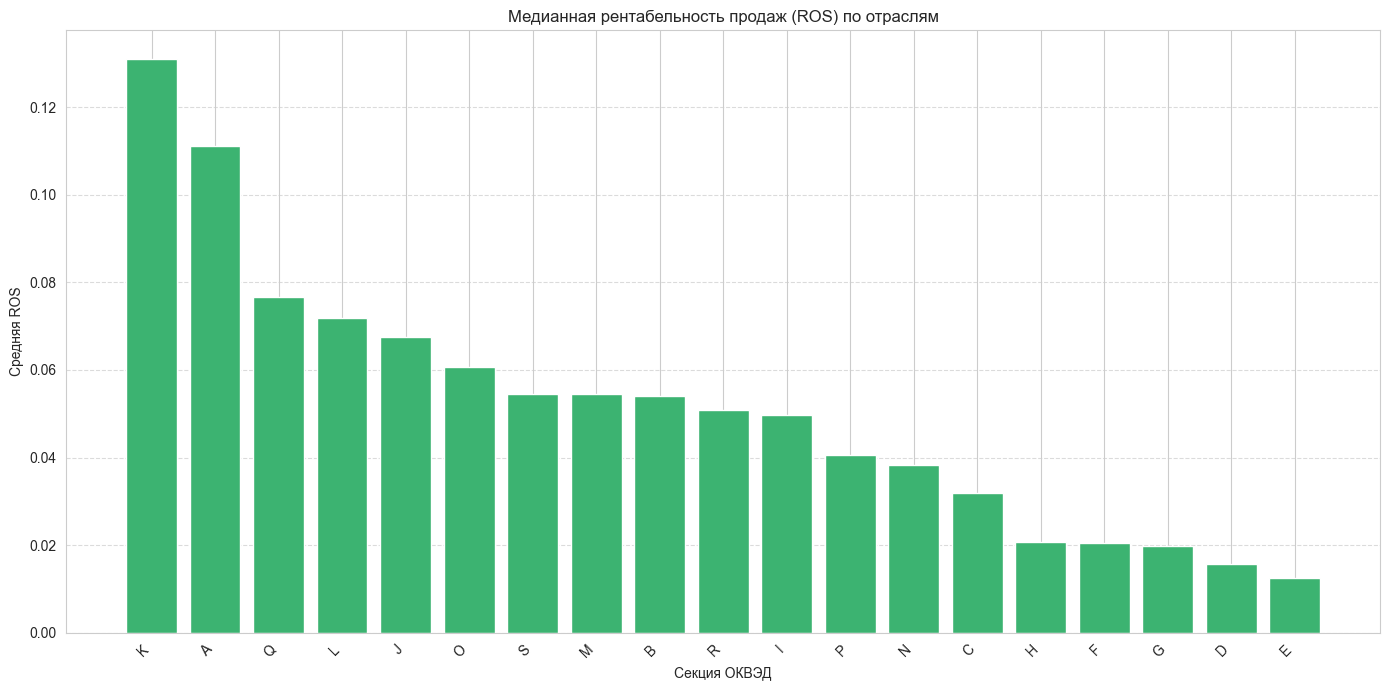

In [45]:
# 3. Столбчатая диаграмма средних значений ROS по отраслям
# Рассчитаем медианны ROS по отраслям с помощью Polars
avg_ros_by_industry = (
    df_with_ratios
    .group_by('okved_section')
    .agg(pl.median('ros').alias('avg_ros'))
    .sort('avg_ros', descending=True)
    .to_pandas()
)

plt.figure(figsize=(14, 7))
plt.bar(avg_ros_by_industry['okved_section'], avg_ros_by_industry['avg_ros'], color='mediumseagreen')
plt.title('Медианная рентабельность продаж (ROS) по отраслям')
plt.xlabel('Секция ОКВЭД')
plt.ylabel('Средняя ROS')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Практические задание 2. 

Продолжительность: 20-30 минут 

2.1 Задача: Построить violin plot для сравнения распределения ROA по топ-5 отраслям. 

2.2 Задача: Построить heatmap корреляций между ключевыми показателями (ROA, ROS, Leverage, Current Ratio, EBITDA Margin) для выявления скрытых связей.




# Пример. Анализ по отраслям 


<positron-console-cell-46>:19: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)


Сравнение отраслей по финансовым показателям:
shape: (19, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ okved_sectio ┆ количество_ ┆ средняя_выр ┆ средняя_при ┆ средняя_ROS ┆ средняя_ROA ┆ средний_лев │
│ n            ┆ компаний    ┆ учка        ┆ быль        ┆ ---         ┆ ---         ┆ еридж       │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ f64         ┆ f64         ┆ ---         │
│ str          ┆ u32         ┆ f64         ┆ f64         ┆             ┆             ┆ f64         │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ F            ┆ 23568       ┆ 864991.8277 ┆ 38458.40440 ┆ 0.052236    ┆ 1.557174    ┆ 0.780792    │
│              ┆             ┆ 75          ┆ 4           ┆             ┆             ┆             │
│ L            ┆ 6298        ┆ 474638.5309 ┆ 74489.20292 ┆ 0.165839    ┆ 0.897555    ┆ 0.717794    │
│              ┆             ┆

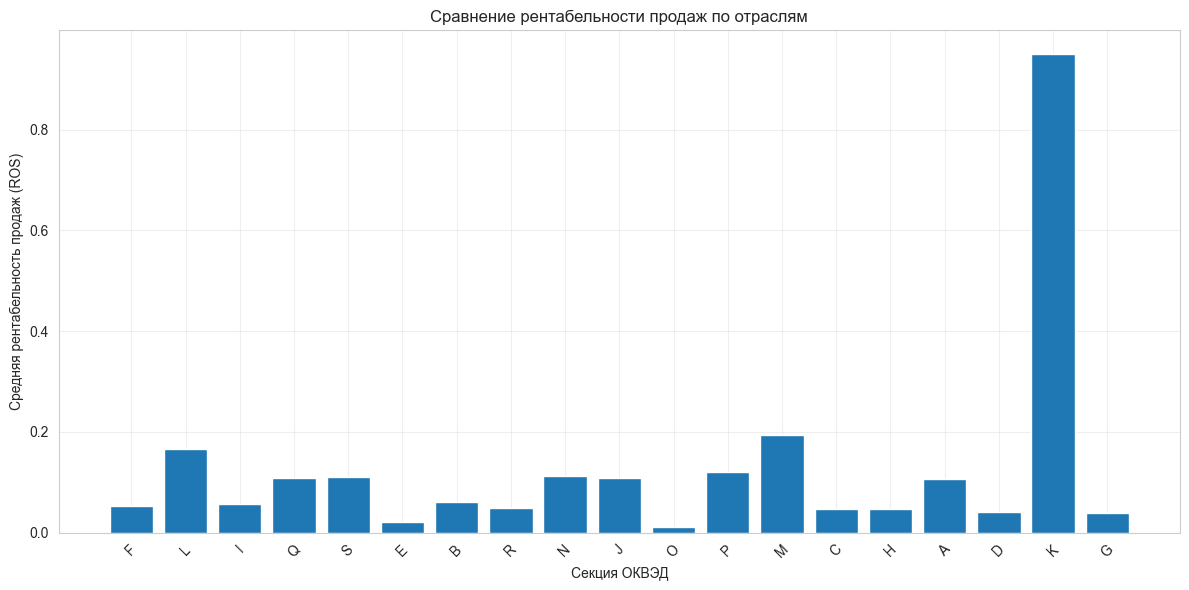

In [46]:
# Пример 1: Сравнение отраслей по финансовым показателям
# Используем данные с рассчитанными показателями

if 'df_with_ratios' in locals():
    # Проверка и добавление столбца 'leverage', если он отсутствует
    if 'leverage' not in df_with_ratios.columns:
        print("Столбец 'leverage' не найден. Пересчитываем...")
        df_with_ratios = df_with_ratios.with_columns(
            ((pl.col('line_1400') + pl.col('line_1500')) / pl.col('line_1600')).alias('leverage')
        ).filter(
            pl.col('leverage').is_finite()
        )

    # Группировка по секциям ОКВЭД и расчет средних показателей
    industry_analysis = (
        df_with_ratios
        .group_by('okved_section')
        .agg([
            pl.count().alias('количество_компаний'),
            pl.mean('line_2110').alias('средняя_выручка'),
            pl.mean('line_2400').alias('средняя_прибыль'),
            pl.mean('ros').alias('средняя_ROS'),
            pl.mean('roa').alias('средняя_ROA'),
            pl.mean('leverage').alias('средний_леверидж'),
        ])
        .filter(pl.col('количество_компаний') >= 3)  # Минимум 3 компании в отрасли
        .sort('средняя_ROA', descending=True)
    )
    
    print("Сравнение отраслей по финансовым показателям:")
    print(industry_analysis)
    
    # Визуализация: сравнение ROS по отраслям
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    industry_pd = industry_analysis.select(['okved_section', 'средняя_ROS']).to_pandas()
    plt.bar(industry_pd['okved_section'], industry_pd['средняя_ROS'])
    plt.xlabel('Секция ОКВЭД')
    plt.ylabel('Средняя рентабельность продаж (ROS)')
    plt.title('Сравнение рентабельности продаж по отраслям')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Сначала выполните расчет финансовых показателей (ячейка выше)")


# Анализ за несколько периодов 

In [47]:
def load_rfsd_years_polars(
    years,
    rfsd_path=RFSD_PATH,
    columns=None,
    filters=None,
    lazy=True
):
    """
    Эффективно загружает данные RFSD за несколько лет используя Polars.
    Пропускает годы, для которых не удалось загрузить данные.
    
    Parameters:
    -----------
    years : list of int
        Список лет данных (например, [2022, 2023, 2024])
    rfsd_path : Path or str
        Путь к папке с данными RFSD
    columns : list of str, optional
        Список столбцов для загрузки (None = все столбцы)
    filters : list, optional
        Список фильтров Polars для применения при чтении
    lazy : bool
        Если True, возвращает LazyFrame (рекомендуется для больших данных)
        
    Returns:
    --------
    pl.LazyFrame or pl.DataFrame or None
        LazyFrame или DataFrame с данными за все указанные годы (с добавленным столбцом 'year'),
        или None, если не удалось загрузить данные ни за один год.
    """
    if not isinstance(years, (list, tuple)):
        raise ValueError("years должен быть списком или кортежем")
    
    if len(years) == 0:
        raise ValueError("Список лет не может быть пустым")
    
    # Загружаем данные за каждый год и добавляем столбец 'year'
    lazy_frames = []
    loaded_years = []
    for year in sorted(list(set(years))): # Уникальные отсортированные годы
        lf_year = load_rfsd_year_polars(
            year=year,
            rfsd_path=rfsd_path,
            columns=columns,
            filters=filters,
            lazy=True
        )
        # Проверяем, что данные загрузились
        if lf_year is not None:
            # Добавляем столбец с годом
            lf_year = lf_year.with_columns(pl.lit(year).alias('year'))
            lazy_frames.append(lf_year)
            loaded_years.append(year)
    
    if not lazy_frames:
        warnings.warn("Не удалось загрузить данные ни за один из указанных годов.")
        return None
    
    # Объединяем все LazyFrame в один
    if len(lazy_frames) == 1:
        result_lf = lazy_frames[0]
    else:
        # Собираем каждый год отдельно и объединяем как DataFrame
        # Это необходимо, так как pl.concat для LazyFrame из разных источников может вызывать ошибки
        dfs = [lf.collect() for lf in lazy_frames]
        
        # Объединяем все DataFrame с параметром how='vertical_relaxed'
        # Это позволяет объединять DataFrame с разными типами столбцов (String vs Categorical)
        combined_df = pl.concat(dfs, how='vertical_relaxed')
        
        # Преобразуем обратно в LazyFrame если нужно
        result_lf = combined_df.lazy()
    
    if lazy:
        print(f"Создан LazyFrame для {len(loaded_years)} годов: {loaded_years}")
        if columns:
            print(f"Выбрано {len(columns)} переменных из доступных")
        print("Используйте .collect() для выполнения вычислений")
        return result_lf
    else:
        df = result_lf.collect()
        print(f"Загружено {len(df):,} наблюдений за {len(loaded_years)} годов: {loaded_years}")
        if columns:
            print(f"Загружено {len(columns)} переменных из доступных")
        return df

In [48]:
# Пример 5: Анализ динамики показателей за несколько лет
# Для этого примера нужно загрузить данные за несколько лет

# Загружаем данные за 2022-2024 годы с расчетом показателей
lf_multiyear = load_rfsd_years_polars(
    [2019, 2020,2021, 2022, 2023, 2024],
    columns=key_columns
)

# Применяем фильтры
lf_multiyear_filtered = lf_multiyear.filter(
    (pl.col('filed') == 1) & 
    (pl.col('line_2110') > 1_000)
)

# Рассчитываем показатели на уровне LazyFrame
lf_multiyear_with_ratios = calculate_financial_ratios_polars(lf_multiyear_filtered)

# Фильтруем валидные значения
lf_multiyear_valid = lf_multiyear_with_ratios.filter(
    (pl.col('ros').is_finite()) &
    (pl.col('roa').is_finite())
)


Создан LazyFrame для 2019 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2020 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2021 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2022 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2023 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2024 года
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 6 годов: [2019, 2020, 2021, 2022, 2023, 2024]
Выбрано 21 переменных из доступных
Используйте .collect() для выполнения вычислений


In [49]:
df_multiyear = lf_multiyear_valid.collect()

In [50]:
# Анализ динамики по годам
if 'df_multiyear' in locals():
    print("Динамика рентабельности по годам (взвешенная):")

    yearly_stats = (
        df_multiyear
        .group_by('year')
        .agg([
            pl.sum('line_2110').alias('суммарная_выручка'),
            pl.sum('line_2400').alias('суммарная_прибыль'),
            pl.count().alias('количество_компаний')
        ])
        .with_columns([
            # Средняя выручка на фирму
            (pl.col('суммарная_выручка') / pl.col('количество_компаний')).alias('выручка_на_фирму'),
            # Средняя прибыль на фирму
            (pl.col('суммарная_прибыль') / pl.col('количество_компаний')).alias('прибыль_на_фирму'),
            # Взвешенная рентабельность продаж
            (pl.col('суммарная_прибыль') / pl.col('суммарная_выручка')).alias('ROS'),
        ])
        .sort('year')
        .with_columns([
            (pl.col('выручка_на_фирму') / 1_000).alias('выручка_на_фирму_млн'),
            (pl.col('прибыль_на_фирму') / 1_000).alias('прибыль_на_фирму_млн'),
            (pl.col('ROS') * 100).alias('ROS_%')
        ])
    )

    print(yearly_stats.select([
        'year', 
        'количество_компаний', 
        'выручка_на_фирму_млн', 
        'прибыль_на_фирму_млн', 
        'ROS_%'
    ]))
    
   

Динамика рентабельности по годам (взвешенная):


<positron-console-cell-50>:11: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)


shape: (6, 5)
┌──────┬─────────────────────┬──────────────────────┬──────────────────────┬───────────┐
│ year ┆ количество_компаний ┆ выручка_на_фирму_млн ┆ прибыль_на_фирму_млн ┆ ROS_%     │
│ ---  ┆ ---                 ┆ ---                  ┆ ---                  ┆ ---       │
│ i32  ┆ u32                 ┆ f64                  ┆ f64                  ┆ f64       │
╞══════╪═════════════════════╪══════════════════════╪══════════════════════╪═══════════╡
│ 2019 ┆ 1272702             ┆ 163.264303           ┆ 12.109608            ┆ 7.41718   │
│ 2020 ┆ 1287351             ┆ 155.419315           ┆ 9.641268             ┆ 6.203391  │
│ 2021 ┆ 1290264             ┆ 191.711826           ┆ 21.65814             ┆ 11.297237 │
│ 2022 ┆ 1282770             ┆ 373.208671           ┆ 48.166836            ┆ 12.906141 │
│ 2023 ┆ 1301980             ┆ 237.504531           ┆ 26.940566            ┆ 11.34318  │
│ 2024 ┆ 1303778             ┆ 257.178775           ┆ 16.725135            ┆ 6.503311  │
└──────

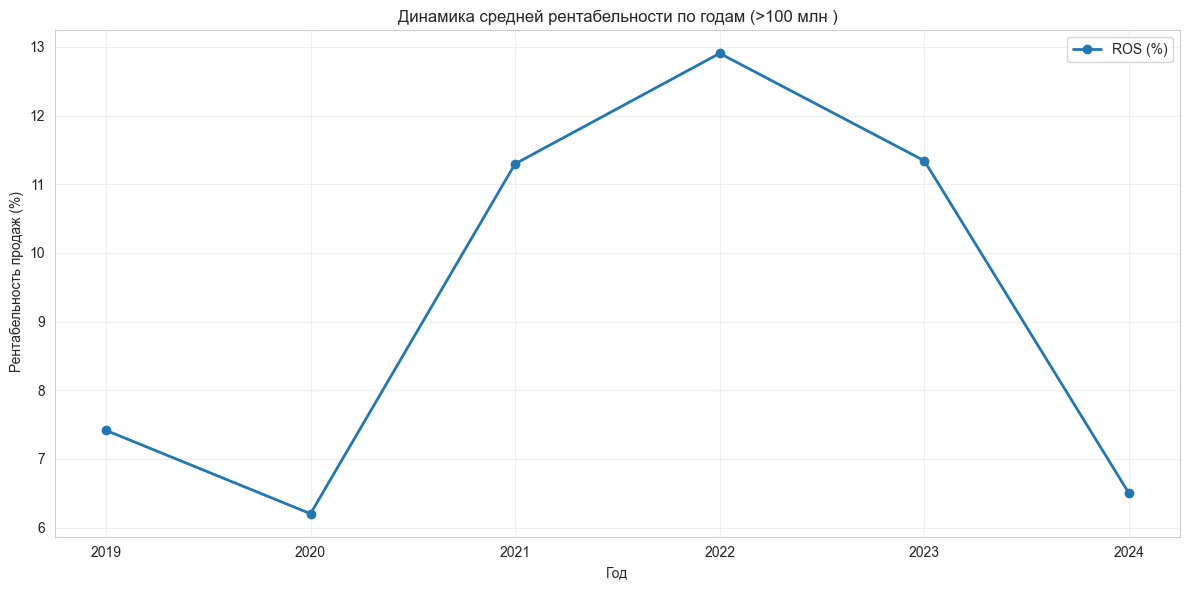

In [51]:
 # Визуализация динамики
  
yearly_pd = yearly_stats.select(['year', 'ROS_%']).to_pandas()
    
plt.figure(figsize=(12, 6))
plt.plot(yearly_pd['year'], yearly_pd['ROS_%'], marker='o', label='ROS (%)', linewidth=2)
plt.xlabel('Год')
plt.ylabel(' Рентабельность продаж (%)')
plt.title('Динамика средней рентабельности по годам (>100 млн )')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
